<a href="https://colab.research.google.com/github/mishc9/dle-notebooks/blob/master/intro_into_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Что делать между занятиями

### Домашнее задание

* Посмотреть в конце презентации визуализацию карт активации и фильтров сверточных слоев. Прочитайте код и комментарии к визуализации.

* Расчитать размер поля восприятия для нейрона с последнего сверточного слоя. Если есть вопросы - пишите.

* Обучить нейронную сеть:

  * Используя слои MaxPooling2D, Conv2D, Dense, получить val_accuracy > 0.7
  * Можно использовать другие слои
  * Можно менять параметры слоев и оптимизатора
  * Можно добавлять другие слои
  * Можно смотреть, какие есть примеры нейросетей для cifar-10
  * Нельзя менять оптимизатор и функцию ошибки.

### Что почитать?

Чтобы быть готовыми к следующему занятию, прочитайте (а лучше решите 1-2 примера)
* Расчет производной сложной функции
* Расчет производной функции нескольких переменных
* Расчет производной вектора по вектору
* Как вычисляется произведение матрицы на матрицу, матрицы на ветор
* Что такое вырожденная матрица
* Что такое определитель матрицы и как его расчитать
* Что такое слуайная переменная
* Что такое плотность вероятности
* Как найти матожидание
* Что такое условная и совместная вероятность

Чем больше вы прочитаете и чем больше решите простых примеров, тем проще вам будет :)

Если больше практики в сверточных сетях, посмотрите [эту статью](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html). И выполните те примеры, которые там написаны, конечно.

На следующем занятии будем в основном о том, какие бывают функции ошибки (критерий качества модели), и как оптимизировать веса нейронной сети (Stochastic Gradient Descent).


# ML как "новая" парадигма

* Конечно, ML существует уже не первый десяток лет
* Регрессионные модели тоже можно считать машинным обучением. Концепции нейронной сети больше 60 (!) лет.
* В конце 80-х годов создали первый беспилотный автомобиль, который проехал между городами
* Что же отличает машинное обучение от "традиционного" написания программ? В чем "новизна" этого подхода? 

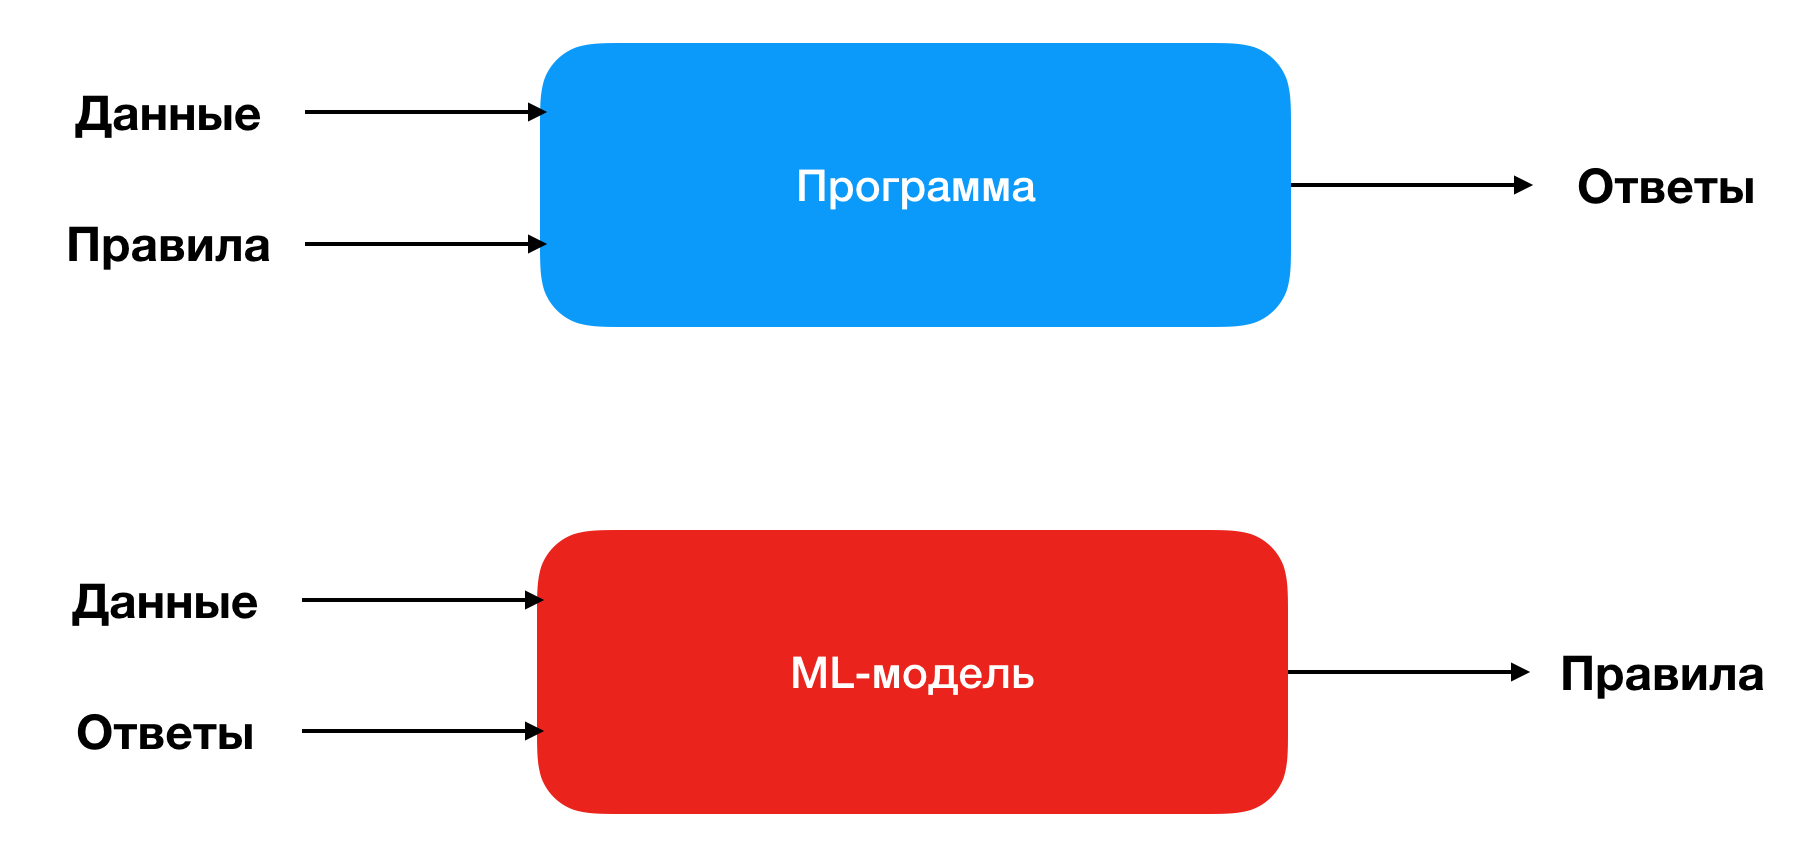

## Зачем нужен второй подход?
> Некоторые проблемы могут быть решены при помощи относительно "простого" набора правил. Некоторые - нет. Область Computer Vision состоит из проблем последнего типа.


## Задачи компьютерного зрения

> Есть много классов ML-задач. Чтобы никого не утомлять, перейдем к практике мы Разные классы проблем мы будем рассматривать по мере поступления.

* Классификация объектов
* Детекция объектов
* Сегментация объектов
* Поиск похожих объектов и кластеризация объектов
* Отслеживание объектов на видео
* Улучшение качества изображения. В меньшей степени можно отнести генерацию изображений
* ...


## Классификация изображений

* Одна из самых "простых"
* Начали работать с этой задачей раньше, чем с другими
* Решали не обязательно с помощью нейронных сетей
* Первое практическое применение - распознавание почтовых индексов в США (1995, LeNet)

## Общий подход

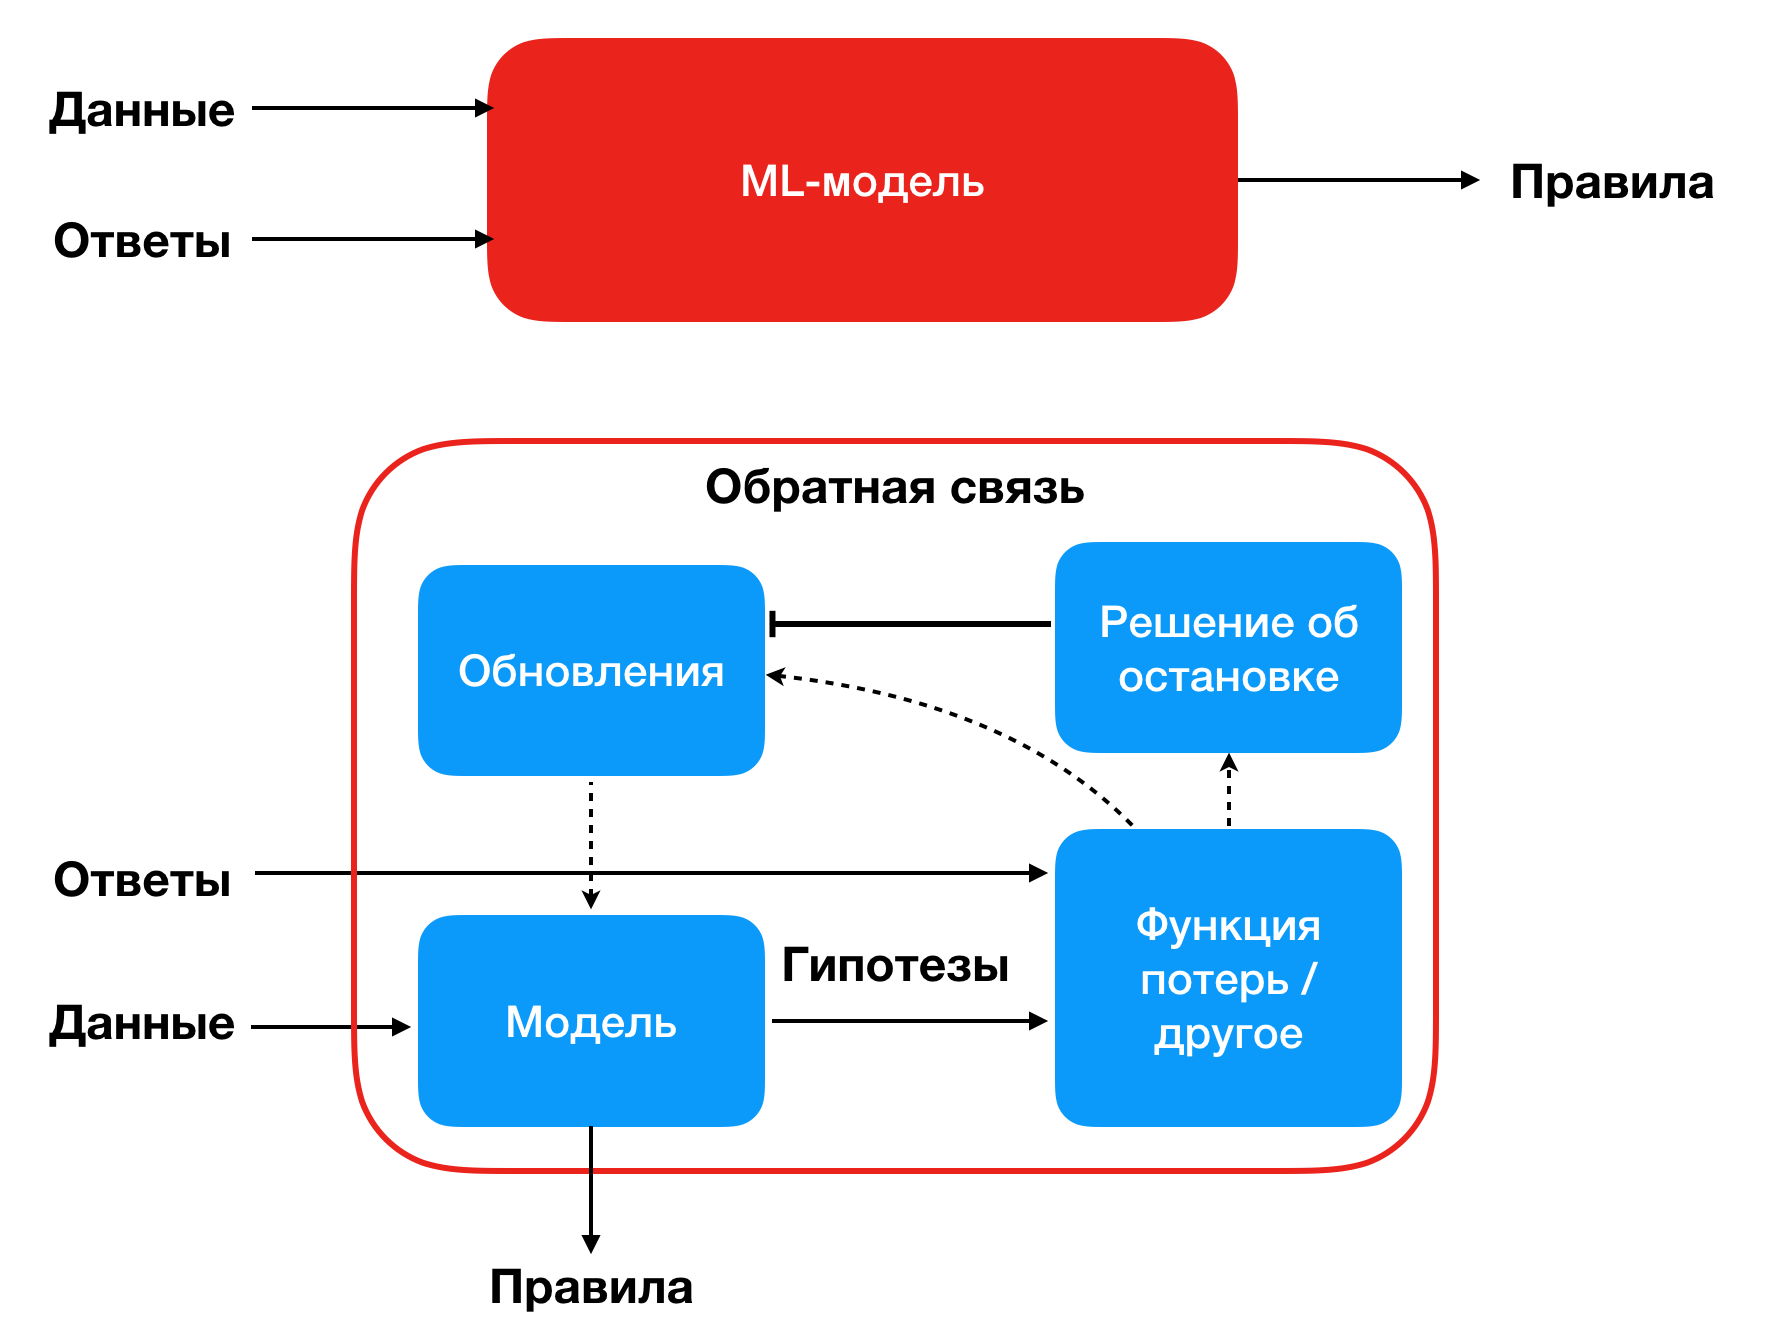

## Теперь рассмотрим блоки по отдельности

* Модель
* Функция потерь
* Обновления
* Решение об остановке

## Модель

Мы будем пользоваться нейронными сетями.

* Нейронная сеть состоит из слоев
* Слои не обязательно идут послежовательно. Но это наиболее частая ситуация
* Перед самой нейронной сетью, как правило, добавлена предобработка данных

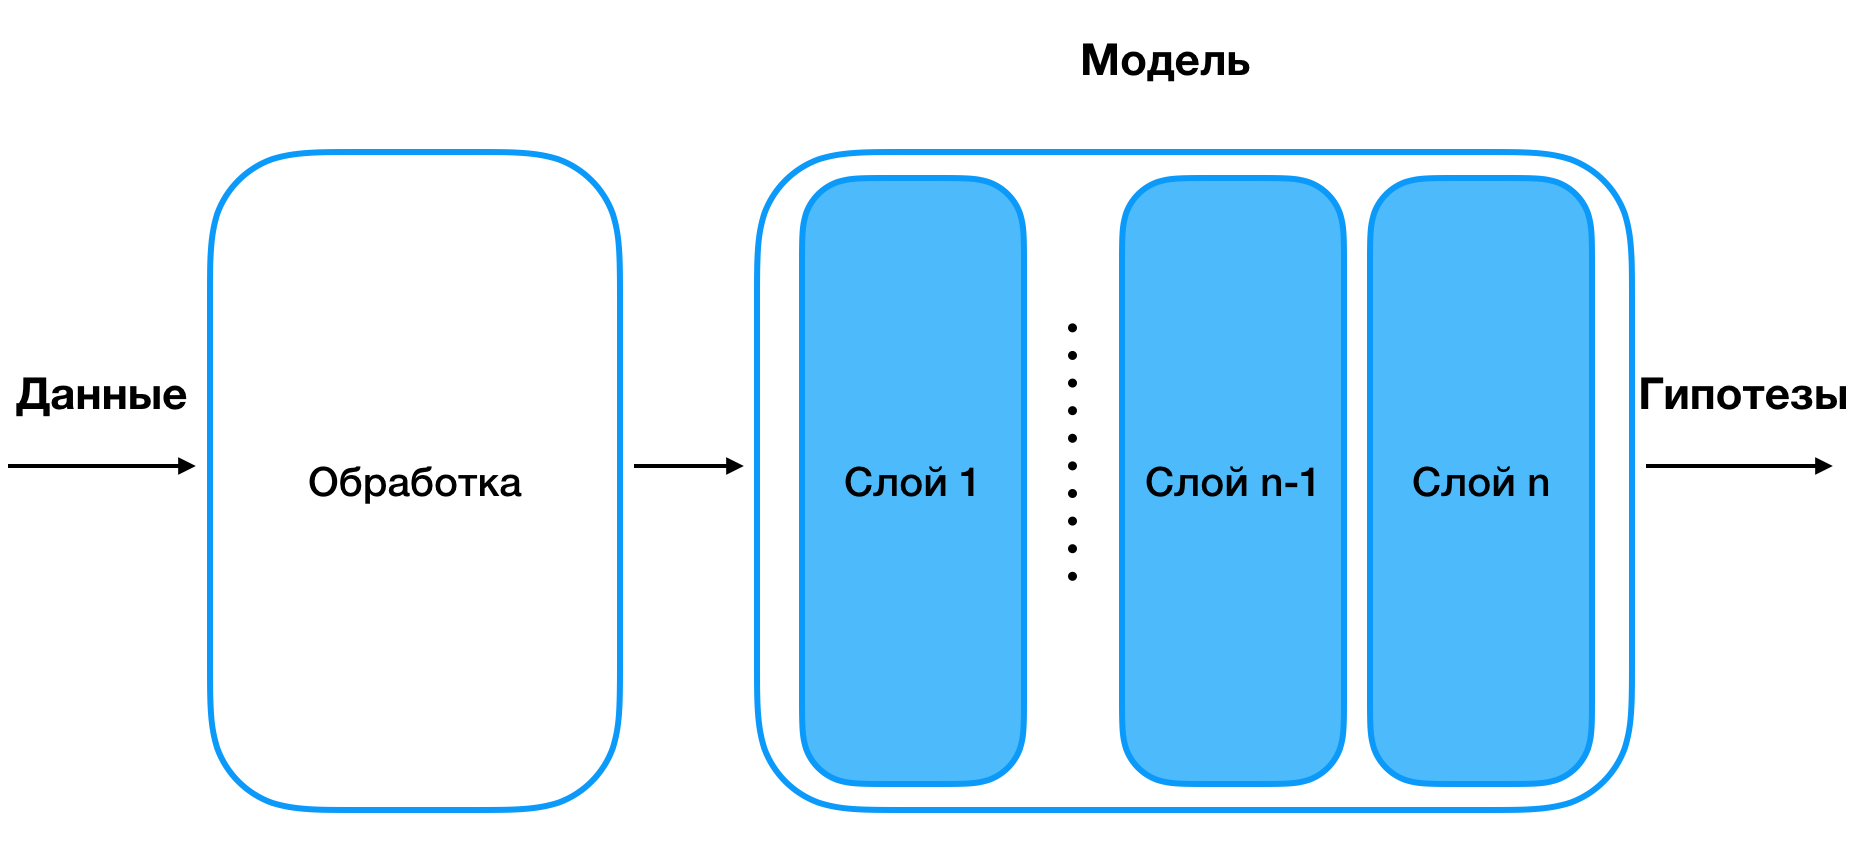

### Обработка изображений

* Нормализация данных
* Изменение размера, обрезка изображений к одному размеру
* Другие операции, если они будут нужны: коррекция гаммы, растяжение... и так далее

### Нормализация

При нормализации данных их переводят в заранее ограниченный диапазон. Есть несколько типов нормализации: 
* min-max нормализация: $$\frac{x - min(x)}{max(x) - min(x)}$$ переводит данные в диапазон $[0, 1]$
* mean-std нормализация: $$\frac{X - \mu}{\sigma}$$ приводит (нормальное) распределение данных к стандартному нормальному $N(0, 1)$

При обработке изображений используют min-max нормализацию. При этом учитывают следующее.
Изображение - это матрица (`n x m x 3`). Каждый элемент этой матрицы - одни байт, кодирующий цвет (`uint8`). Диапазон значений байтов $[0..255]$, поэтому значения байтов изображения делят на 255 и переводят во float.


### Импортируем нужные библиотеки

In [0]:
%tensorflow_version 2.x  # используем версию tensorflow 2.x
import matplotlib.pyplot as plt  # библиотека для визуализации 
import tensorflow as tf  # фреймворк для машинного обучения
import tensorflow.keras as keras  # API для создания нейросетей
from tensorflow.keras.datasets import cifar10  # Загрузчик датасета
import numpy as np

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # используем версию tensorflow 2.x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


11493376/11490434 [==============================] - 0s 0us/step


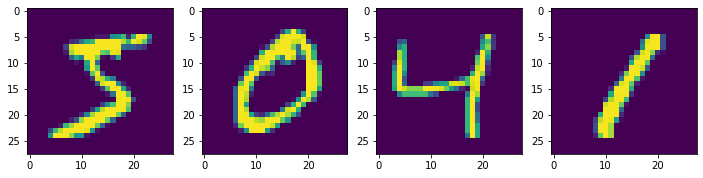

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


def plot_many(images, n_images=4):
  fig, ax = plt.subplots(nrows=1, ncols=n_images, figsize=(12, 12))
  for i in range(n_images):
    ax[i].imshow(images[i])

  
plot_many(x_train)

### Загружаем и изучаем данные 

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

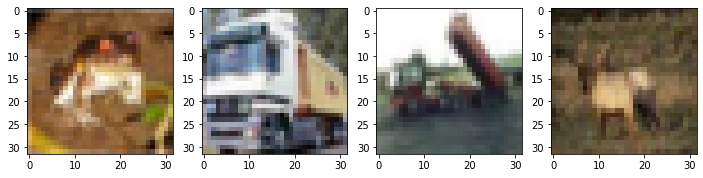

In [0]:
def plot_many(images, n_images=4):
  fig, ax = plt.subplots(nrows=1, ncols=n_images, figsize=(12, 12))
  for i in range(n_images):
    ax[i].imshow(images[i])

  
plot_many(x_train)

In [0]:
def preprocess(images, target_size=None):
  images = images.astype(np.float32) / 255.  # Нормализуем изображения
  # ресайз не нужен, т.к. у нас уже обработанные изображения. Но его можно сделать так:
  if target_size is not None:
    images = tf.image.resize(image, size=target_size)
  return images

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

**! Функция imshow "умная", и рисует изобрежения unint8 в диапазоне 0..255 или float в диапазоне 0..1**

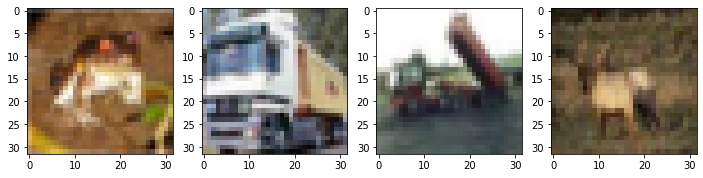

In [0]:
plot_many(x_train)

## Модель

### Свертки

**Расчет свертки**
<img src="https://hsto.org/webt/v9/k2/kc/v9k2kc8ng4nrhryunr3wr6l5brg.png">

* [Материал взят здесь](https://lodev.org/cgtutor/filtering.html)
* В примерах привередены 2D-матрицы фильртров. На самом деле каждый фильтр является трехмерной матрицей: в данном случае матрица повторяется три раза - по одному на каждый канал. Но матрицы не обязаны быть итдентичными.
* Значения в фильтрах приведены для примера и могут меняться. **Важно!** Если мы собираемся рисовать изображение, после расчета фильтр должен отображать данные в тот же диапазон. Т.е. для некоторых фильров нужно поделить или сдвинуть результаты


**Оригинальное изображение**

<img src="https://lodev.org/cgtutor/images/photo3.jpg">

**Блюр**
```
  0, 0, 1, 0, 0,
  0, 1, 1, 1, 0,
  1, 1, 1, 1, 1,
  0, 1, 1, 1, 0,
  0, 0, 1, 0, 0,
```
<img src="https://lodev.org/cgtutor/images/filterblurmore.jpg">

**Вертикальные грани**
```
   0,  0, -1,  0,  0,
   0,  0, -1,  0,  0,
   0,  0,  4,  0,  0,
   0,  0, -1,  0,  0,
   0,  0, -1,  0,  0,
```

<img src="https://lodev.org/cgtutor/images/filterveredge.jpg">

**Диаональные грани**
```
  -1,  0,  0,  0,  0,
   0, -2,  0,  0,  0,
   0,  0,  6,  0,  0,
   0,  0,  0, -2,  0,
   0,  0,  0,  0, -1,
```

<img src="https://lodev.org/cgtutor/images/filterslopededge.jpg">

### Свертки и сверточные слои
* Как устроен сверточный слой? Это много фильтров (трехмерных массивов), сгруппированных вместе.
* Они получают на вход трехмерный массив N x M x d1 и возвращают другой массив N' x M' x d2.
* Получившиеся в результате применения свертки массивы, составляющие двухмерный массив, называются *картами признаков* (feature map).
* К картам признаков, как правило, применяется *функция активации.*
<img src="https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=979">
* Значения сверточных фильров - или веса сверточного слоя, другими словами - те параметры, которые ваша нейронная сеть будет искать в процессе обучения. Из них в итоге будут сформулированы _правила_ (см. слайд в начале) для классификации объектов.
* Обратите внимание, что 


### Модульное устройство слоя

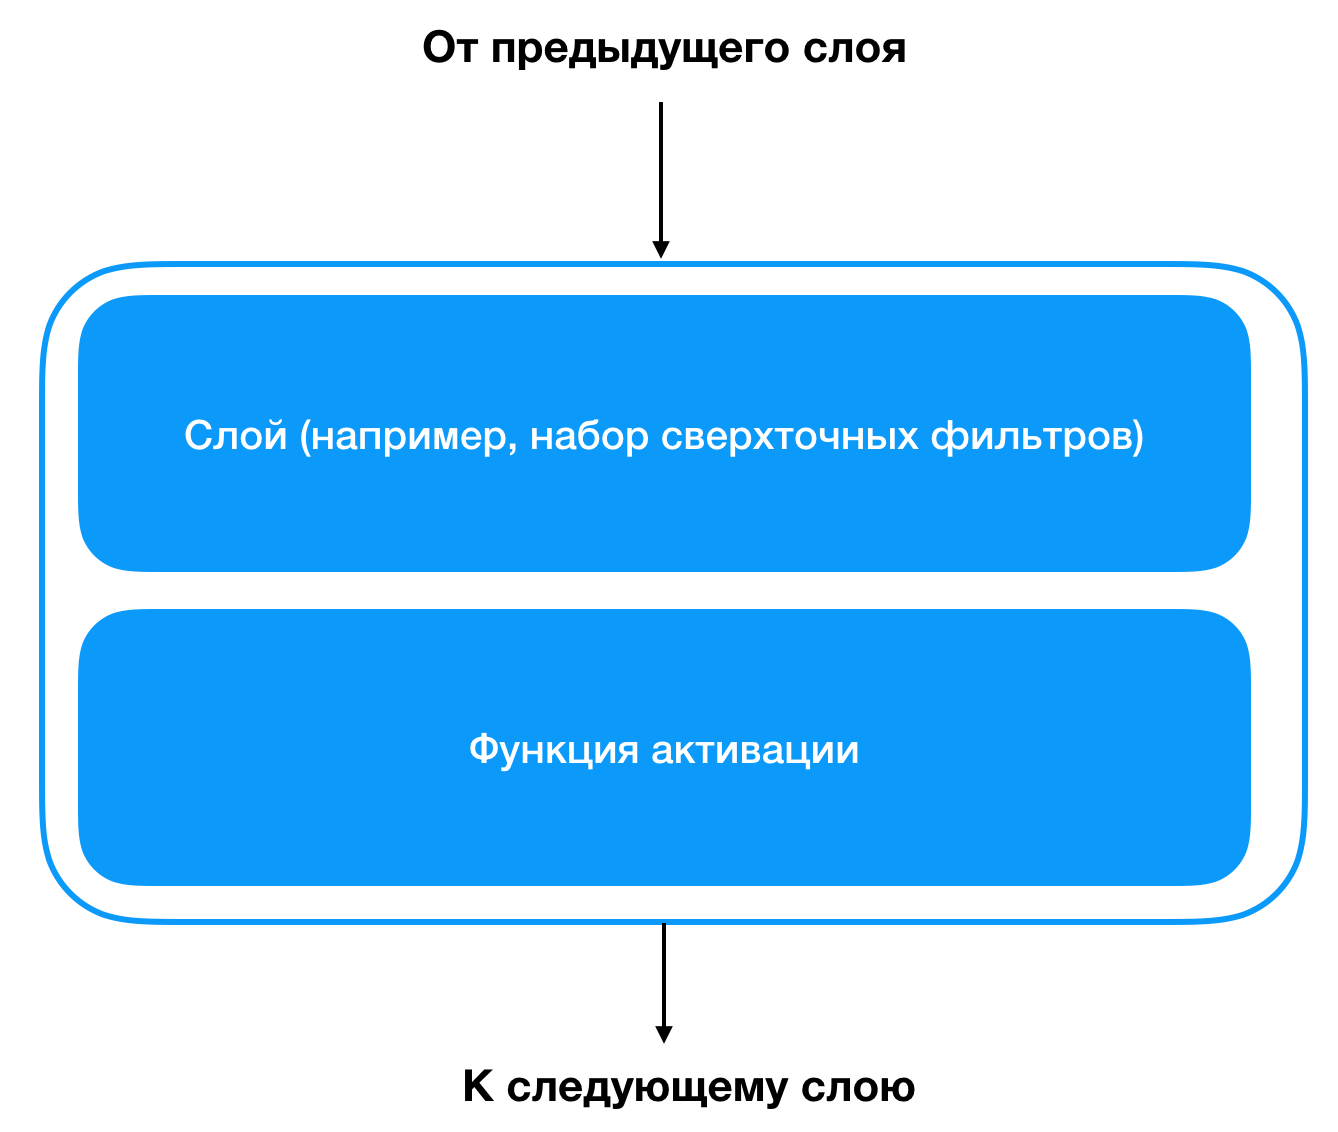

### Что такое функция активации и зачем она нужна

* Без функции активации (базовые) слои выполяют линейные преобразования данных.
* (дело в том, что некоторые слои достаточно сложны и включают в себя несколько функций активации)
* N линейных преобразований, идущих подряд, можно заменить одним: $$W_1W_2x = W'x$$ Значит, добавлять больше слоев не имеет смысла. 
* Если не добавить нелинейности при помощи функции активации! Например, $a(W_1(a(W_2x)))$, где $a$ - функция активации, применяющаяся поэлементно, может давать более разнообразные преобразования, чем $W'x$.

### Примеры функций активации

* ReLU (rectified linear unit): $a(x) = max(0, x)$
* Logistic sigmoid: $$a(x) = \frac{1}{1 + e^{-x}}$$
* Гипербоилческий тангенс, ELU, ...


### Сравнение сигмоиды и ReLU

* При больших по модулю значениях $x$ производная сигмоиды стремится к нулю
* У ReLU всего два значения производной: 0 и 1. Почему это важно, скоро будет понятно.
<img src="https://www.researchgate.net/profile/Seiichi_Uchida/publication/308819504/figure/fig1/AS:519805737410560@1500942753614/A-plot-of-the-atan-and-ReLU-activation-function-and-their-derivative.png">

### Создание сверточных слоев

* Для создания сверточных слоев мы используем API keras. Экземпляр слоя создается с помощью `keras.layers.Conv2D`. 
* Большинство параметров заданы по умолчанию. Обычно задают `filters`, `kernel_size`, `activation`. Остальное меняют редко.

In [0]:
conv_layer_1 = keras.layers.Conv2D(filters=16,  # количество сверточных фильтров
                                   kernel_size=(3, 3),  # ширина и высота сверточного фильра 
                                   padding='valid',  # как именно решать проблему изменения размера карты признаков
                                   activation='relu',  # функция активации
                                   kernel_initializer='glorot_uniform'  # инициализирует веса случайным образом из определенного распределения
                                   )

Для создания нейронной сети нам потребуется несколько сверточных слоев и несколько пулинг-слоев

### Maxpooling-слой

* Нужен для того, чтобы сокращать размерность (почти) без потери информации.
<img src="https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_4/Pooling_Simple_max.png">
* Разбивает изображение на блоки `k x k`, внутри каждого из блоков на кажлой карте признаков выбирает максимальное значение и возвращает его.
* Таким образом, размер изображения снижается, что позволяет добиться двух вещей: ускорить обработку данных и расширить поле восприятие (receptive field) каждого нейрона
<img src="https://www.researchgate.net/publication/316950618/figure/fig4/AS:495826810007552@1495225731123/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks.png">
* Снижать скорость обработки за счет уменьшения размера обрабатываемых изображений - понятный плюс
* Увеличивать поле восприятия нужно для того, чтобы на *более поздних слоях нейросеть работала с более высокоуровневыми семантическими признаками*, например, определяла наличие характерных паттернов расцветки или объектов. Естественно, для больших объектов нужно большое поле восприятия.

### Создание макспулинг - слоя

> Кстати, у этого слоя нет параметров, которые нужно подбирать в процессе обучения. 

In [0]:
mp_layer = keras.layers.MaxPool2D(pool_size=(2, 2),  # Размер окна, в котором проводится пулинг
                                  strides=(2, 2))  # Сдвиг окна (по умолчанию параметр = None, и размер окна равен размеру пулинг-слоя)

### Создание модели для извлечения признаков

Набор соединенных вместе сверточных и полносвязных слоев образует feature extractor

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Мы можем использовать модель для извлечения признаков

* Нейронные сети обучаются не на всех данных, а на данных, разбитых на блоки (батчи). 
* Запуск модели, например, для извлечения признаков тоже можно выполнять батчами
* Мы получили массив с картами признаков для четырех примеров из данных (sample): размер каждой из карт признаков - 4x4, количество карт признаков равно количеству количеству фильтров в последнем сверточном слое
* **На дом**: посчитайте размер поля восприятия нейрона в последнем слое.

In [0]:
batch_size = 4
extracted_features = model(x_train[:batch_size])
print(extracted_features.shape)

(4, 4, 4, 64)


### Классификация

* Карты признаков - это хорошо, но что делать с ними дальше?
* Обычно после сверточных слоев добавляют полносвязный слой или слои.
* Полносвязный слой: $$activation(Wx + b)$$ где $W$ - матрица весов полносвязного слоя, $b$ - ветор сдвигов, $x$ - данные от предыдущего слоя.

<img src="https://lh3.googleusercontent.com/proxy/EwodO2n17m2LbQGrbOiN8W8S48p5GNZy4lofoSZT7UCUihFKVN7iX9lKEU2EX4S60E_ypzk85DapgfKSM5nlt7vo_P9_eoPRpwIHZBFJCFluD_UG4X5hsOjZ">

* На изображении представслена нейросеть из двух полносвязных слоев. Веса слоев соответсвуют "стрелочам" между нейронами. Нейроны - вершины графа.
* Размер матрицы $W$ равен (количеству входных нейронов) x (количество выходных нейронов).
* Размер вектора $b$ равен количеству выходных нейронов.

### Добавляем полносвязные слои к экстрактору признаков 



In [0]:
model.add(keras.layers.Flatten())  # Превратим матрицу (4 x 4 x 64) в вектор (1024,)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Скомпилируем модель

* До этого мы работали только с блоком модели (синий блок на иллюстрации)
* При компиляции мы добавим еще два блока: функцию потерь и способ обновления.
* Также при обучении мы добавим объект, который будет следить за ходом обучения и принимать решение об остановке.

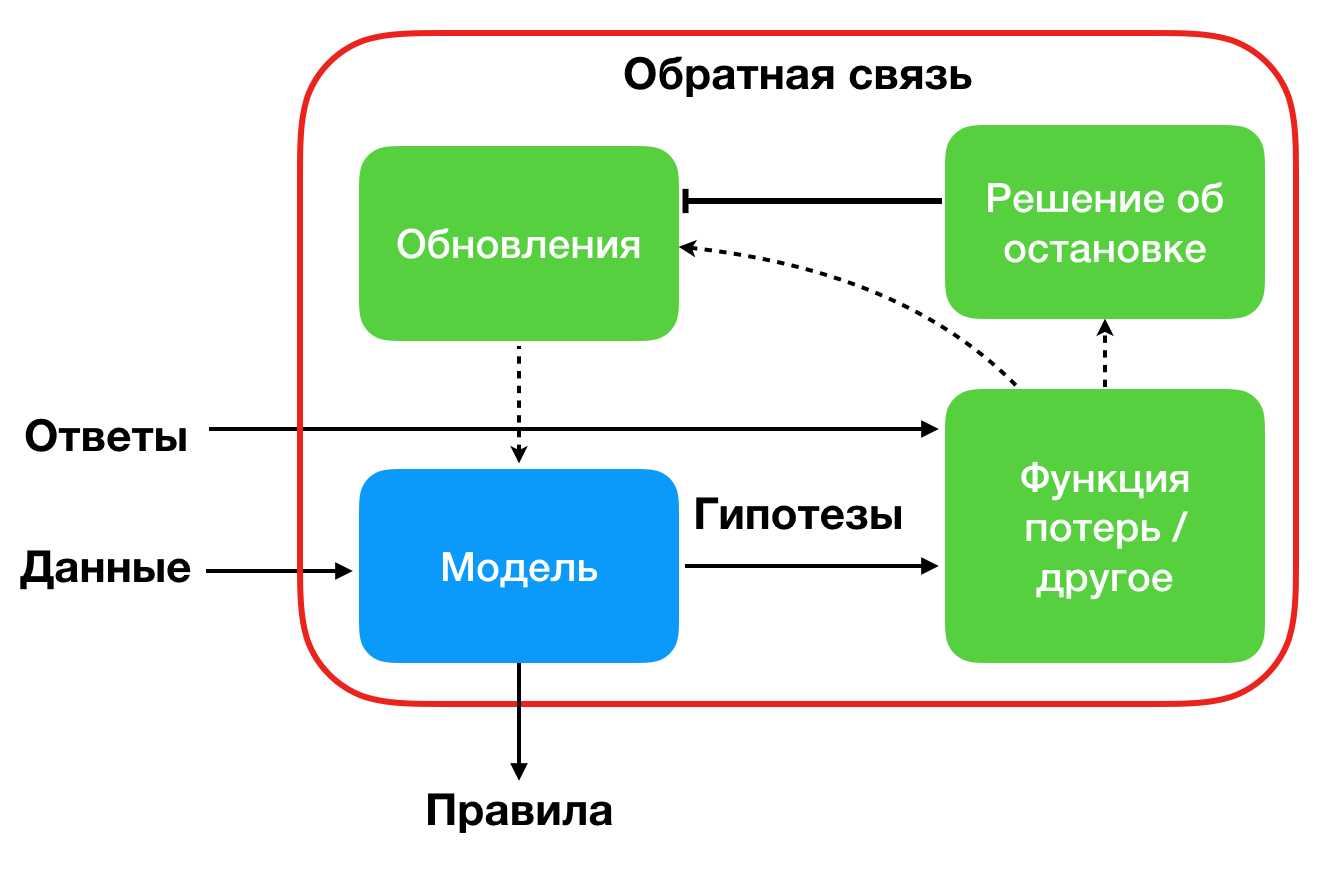

### Компиляция

* Необходимость в этом этапе связана с историческим наследием и деталями реализации фреймворка
* Во время компиляции модели мы добавляем функцию потери (`loss`), способ рассчитывать обновления для весов модели (`optimizer=sgd`), а также метрики, за которыми мы будем следить.
* Эти важные темы мы подробнее обсудим на следующем занятии. 

### Categorical crossentropy и SGD

* $loss(l, \hat{y}) = -\sum_i l_i \cdot log(y_i)$, где $\hat{y}$ - прогноз модели. Это вектор вероятностей того, что объект принадлежит к определенному классу. Мы обсудим, как это связано с приницпом *максимизации правдоподобия* на следующем занятии.
* SGD - итеративный алгоритм, который вычисляет обновления весов модели, расчитывая их обновления как $\frac{\delta L}{\delta w}$. Как именно работает SGD в нейросятях, мы тоже обсудим на следующем занятии.

In [0]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Обучение модели

> Здесь мы добавляем две новых важных концепции: валидационные данные и регуляризация

* Валидационные данные нужны для того, чтобы проверять, научилась ли модель выделять *важные* признаки и строить на основе них правила, или просто *запомнила*
* Мы обсудим способы получения формирования выборки на следующих занятиях
* Регуляризация - способ ограничить нейронную сеть (или другой алгоритм) "запоминать" данные, т.е. извлекать более генерализованные наборы признаков.
* В нашей нейросети используется два вида регуляризации: l2-регуляризация и early stopping.

In [0]:
class StopTraining(keras.callbacks.Callback):
  """
  Простейший способ остановить обучение, если качество достигло желаемого 
  или если ошибка на обучающей выборке стала меньше, чем на тестовой, 
  в нексолько раз, что указывает на переобучение.
  """
  def on_epoch_end(self, epoch, logs):
    if logs['val_loss'] < 1 or logs['loss'] < 0.8 * logs['val_loss']:
      self.model.stop_training = True

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=100,  # Количество раз, когда нейросеть просмотрит все данные
                    validation_data=(x_test, y_test),
                    callbacks=[StopTraining()])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.8515 - accuracy: 0.7067 - val_loss: 1.0736 - val_accuracy: 0.6484


## Домашнее задание

* Используя слои `MaxPooling2D`, `Conv2D`, `Dense`, получить `val_accuracy > 0.7`
* Можно использовать другие слои
* Можно менять параметры слоев и оптимизатора
* Можно добавлять другие слои
* Можно смотреть, какие есть примеры нейросетей для cifar-10 
* **Нельзя** менять оптимизатор и функцию ошибки.


## Визуализация работы слоев

* Посмотрим на то, как выглядят наборы фильтров у необученной сети, и как выглядят они же - у обученной
* Визуализируем карты признаков (feature maps)

### Необходимые функции

In [0]:
from matplotlib import colors


def plot_filters_for_layers(layer):
  """
  Строим набор фильров: т.к. фильтр трехмерный, строим их послойно.
  Части одного фильра (например, 3x3) укладываются в столбец (3xn)x3, 
  где n - количество фильтров.
  """
  w, b = layer.weights  # извлекаем веса из сверточного слоя: (фильтры, сдвиги)
  # w.shape = (высота фильтра х ширина фильтра х № входных каналов х № выходных каналов)
  # Создаем изображение, на котором разместим все фильтры
  target_plot = np.empty((w.shape[0] * w.shape[2], w.shape[1] * w.shape[3]))
  # Теперь вставляем каждый канал каждого фильтра в массив
  for i in range(w.shape[2]):
    for j in range(w.shape[3]):
      target_plot[i*w.shape[0]:(i+1)*w.shape[0], j*w.shape[1]:(j+1)*w.shape[1]] = w[..., i, j]
  # Рисуем массив
  plt.figure(figsize=(20, 10)) 
  plt.imshow(target_plot)
  plt.show()


def get_subplots_grid_size(n_items, max_n_cols):
  """
  Рассчитывает необходимое количество строк и столбцов, 
  исходя из максимального количества столбцов и количества элементов.
  """
  if n_items % max_n_cols == 0:
    n_rows = n_items // max_n_cols
  else:
    n_rows = n_items // max_n_cols + 1
  n_cols = min(n_items, max_n_cols)
  return n_rows, n_cols


def plot_activations_for_layer(image, model, layer_n):
  """
  Создаем модель, выходом которой является нужный нам сверточный слой 
  (его мы получаем по номеру), получаем и строим карту активации.
  Как получить результат из выхода произвольного слоя:
  https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
  """
  # Создаем модель, которая рассматривает выходы на заданном слое
  model = keras.Model(model.input, model.layers[layer_n].output)
  plt.imshow(image)
  plt.axis('off')
  # Извлекаем карту признаков для заданного слоя (см. выше "Свертки и сверточные")
  # слои, карта признаков - output на иллюстрации
  feature_maps = model(np.expand_dims(image, axis=0))[0]
  # Создание нормализации в диапазоне от минимума по картам признаков 
  # до максимума.
  NORM = colors.Normalize(vmin=np.min(feature_maps), vmax=np.max(feature_maps))
  nrows, ncols = get_subplots_grid_size(feature_maps.shape[-1], 8)
  fig, axes = plt.subplots(nrows, ncols, figsize=(12, 2*nrows))
  for i, row in enumerate(axes):
    for j, ax in enumerate(row):
      # рисуем карты признаков по очереди
      ax.imshow(feature_maps[..., i * nrows + j], norm=NORM)
      ax.axis('off')

### Необученная сеть

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())  # Превратим матрицу (4 x 4 x 64) в вектор (1024,)
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### Посмотрим на фильтры необученной сети

> Никаких паттернов в фильтрах не видно: они проинициализированы случайным образом. После обучения это изменится.

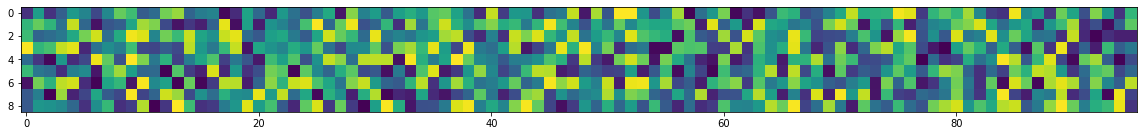

In [0]:
plot_filters_for_layers(model.layers[0])

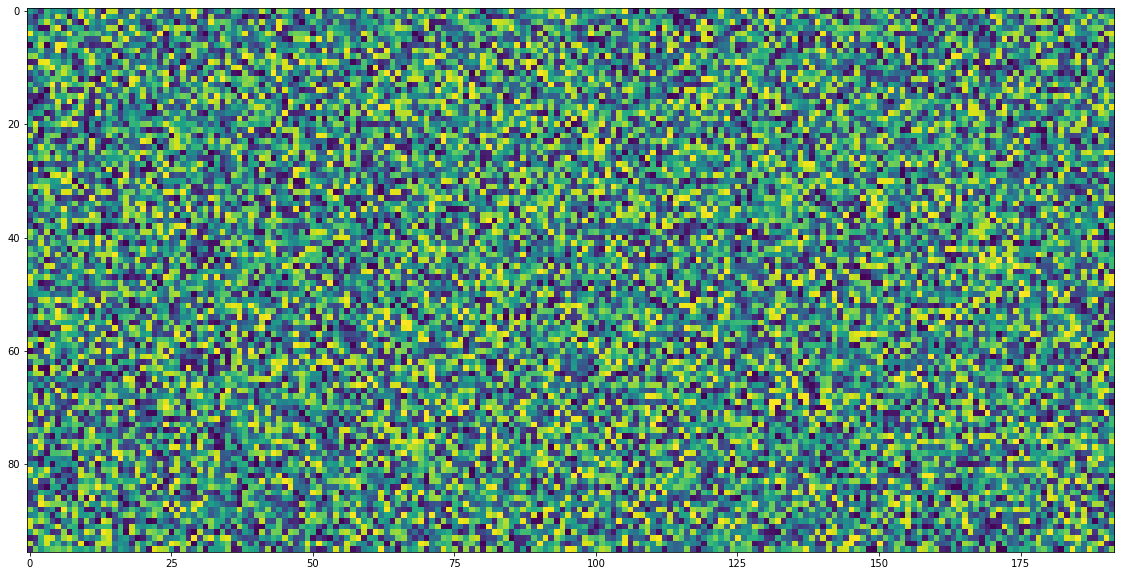

In [0]:
plot_filters_for_layers(model.layers[2])

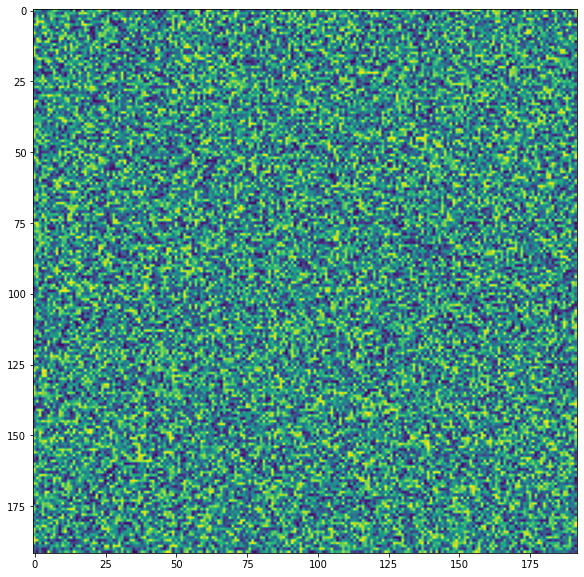

In [0]:
plot_filters_for_layers(model.layers[4])

### И на карты активаций для сверточных слоев

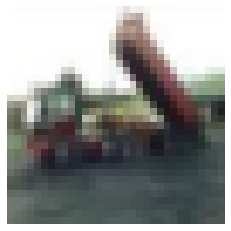

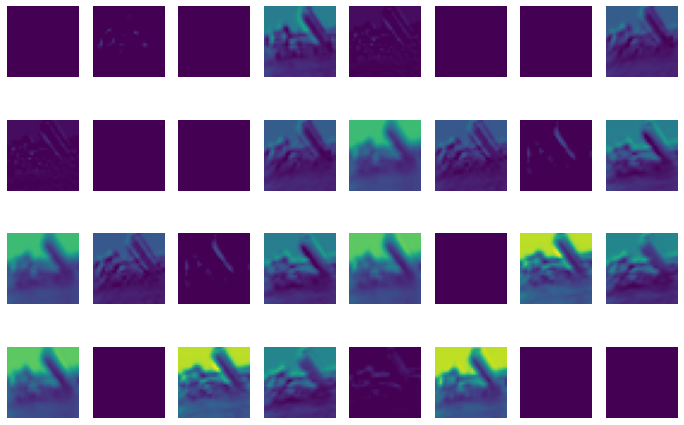

In [0]:
IMAGE_NUM = 2
plot_activations_for_layer(x_train[IMAGE_NUM], model, 0)

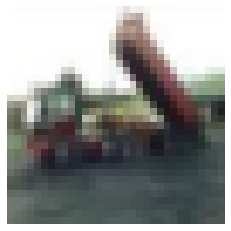

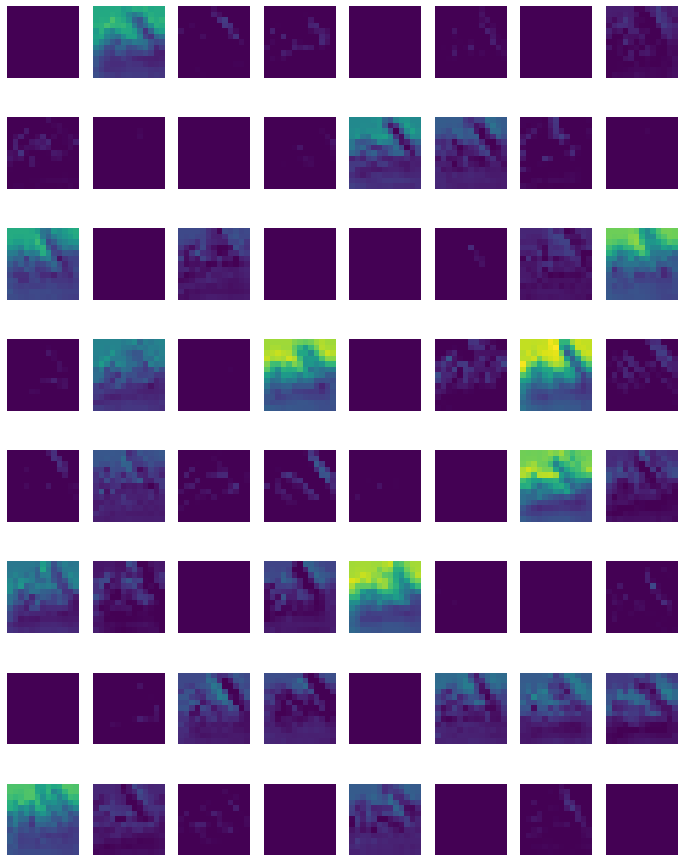

In [0]:
IMAGE_NUM = 2
plot_activations_for_layer(x_train[IMAGE_NUM], model, 2)

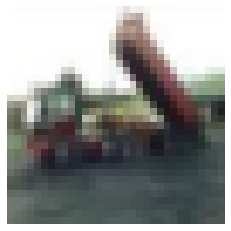

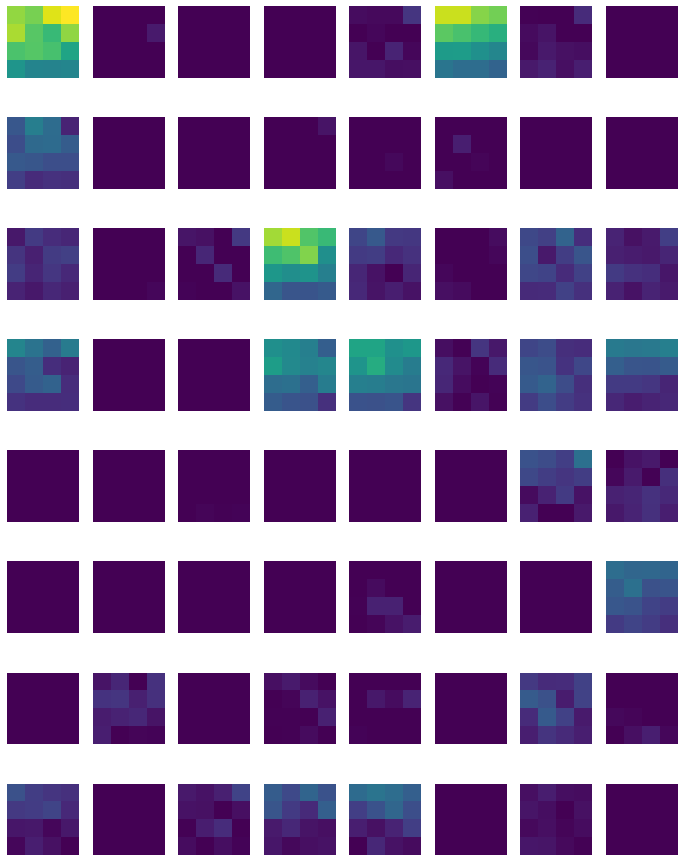

In [0]:
IMAGE_NUM = 2
plot_activations_for_layer(x_train[IMAGE_NUM], model, 4)

* Выводы: на первом сверточном слое много карт призаков практически без активации (т.е. признаков нет), с другой стороны, много повторяющихся карт признаков - избыточность.
* На следующих слоях происходит то же самое
* Финальная карта признаков (перед полносвязным слоем) неинформативна.

### Обучим модель

In [0]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, 
                    epochs=100,  # Количество раз, когда нейросеть просмотрит все данные
                    validation_data=(x_test, y_test),
                    callbacks=[StopTraining()])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 128us/sample - loss: 2.0712 - accuracy: 0.2421 - val_loss: 1.8418 - val_accuracy: 0.3314
Epoch 2/100
50000/50000 [==============================] - 6s 120us/sample - loss: 1.6986 - accuracy: 0.3899 - val_loss: 1.5699 - val_accuracy: 0.4313
Epoch 3/100
50000/50000 [==============================] - 6s 122us/sample - loss: 1.5141 - accuracy: 0.4554 - val_loss: 1.5192 - val_accuracy: 0.4591
Epoch 4/100
50000/50000 [==============================] - 6s 119us/sample - loss: 1.3917 - accuracy: 0.5013 - val_loss: 1.3917 - val_accuracy: 0.4965
Epoch 5/100
50000/50000 [==============================] - 6s 119us/sample - loss: 1.2996 - accuracy: 0.5361 - val_loss: 1.2720 - val_accuracy: 0.5399
Epoch 6/100
50000/50000 [==============================] - 6s 120us/sample - loss: 1.2253 - accuracy: 0.5663 - val_loss: 1.2217 - val_accuracy: 0.5674
Epoch 7/100
50000/50000 [===================

### Фильтры обученной сети


* Обратите внимание, что филтрах первого (и, на самом деле, последующих слоях - но для проверки нужно увеличение) появилась упорядоченость. 
* На первом слое три канала изображения с разными цветами очень похожи друг на друга (если вы оставите от изображения только один канал, вы все равно распознаете его по форме). Поэтому значения "слоев" фильтра очень похожи друг на друга.
* В дальнейшем информация в каналах начинает различаться (т.к. к предыдущим картам признаков применяются *разные* фильтры), и такого сходства в 'слоях'  одного фильтра, связанных с каналами входной карты признаков, не видно. 

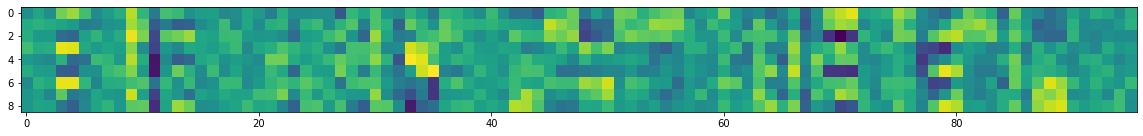

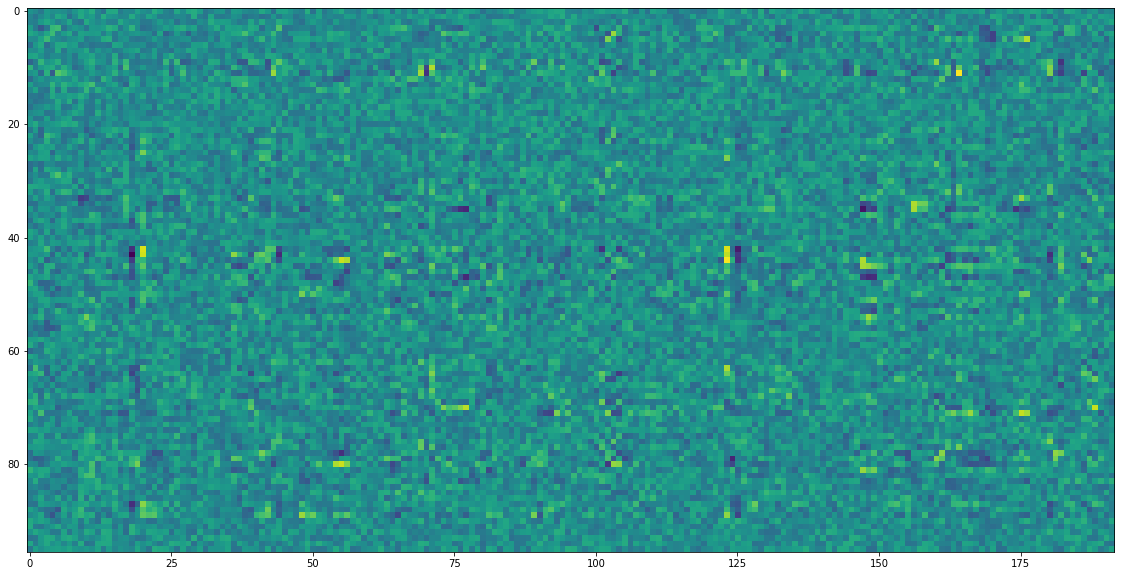

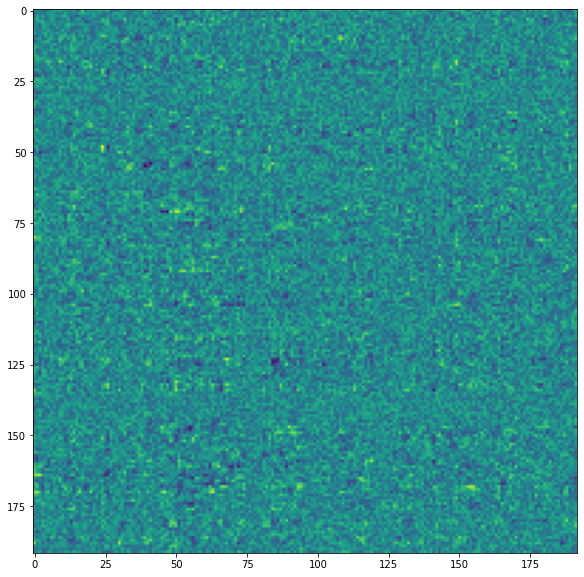

In [0]:
plot_filters_for_layers(model.layers[0])
plot_filters_for_layers(model.layers[2])
plot_filters_for_layers(model.layers[4])

### Посмотрим на активации обученной сети

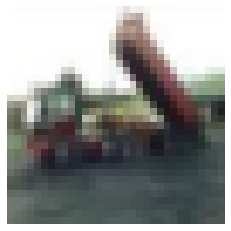

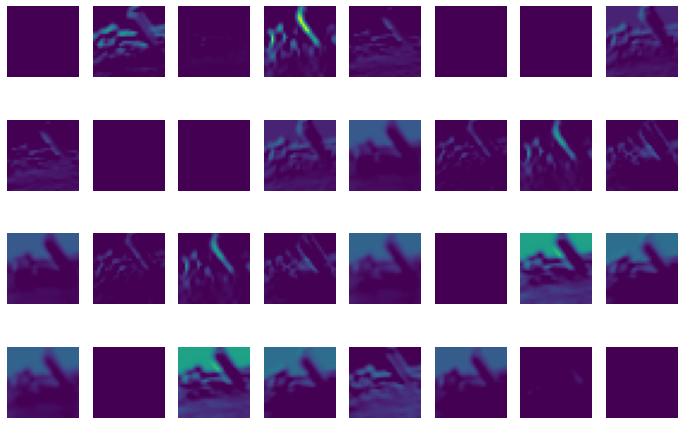

In [0]:
IMAGE_NUM = 2
plot_activations_for_layer(x_train[IMAGE_NUM], model, 0)

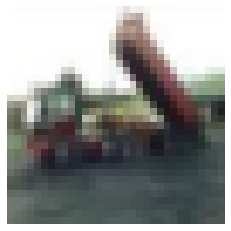

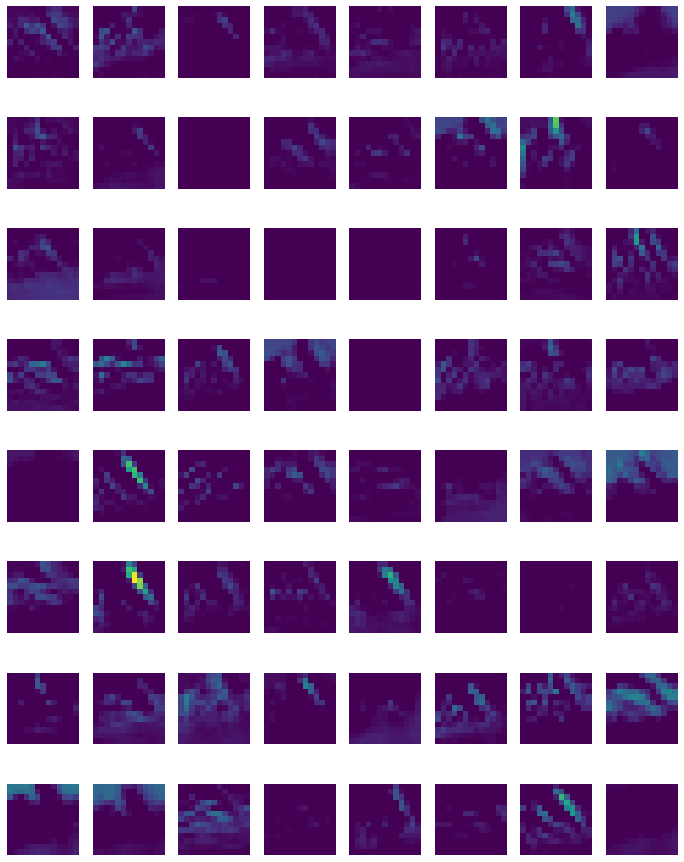

In [0]:
plot_activations_for_layer(x_train[IMAGE_NUM], model, 2)

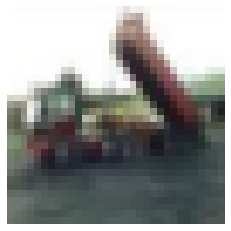

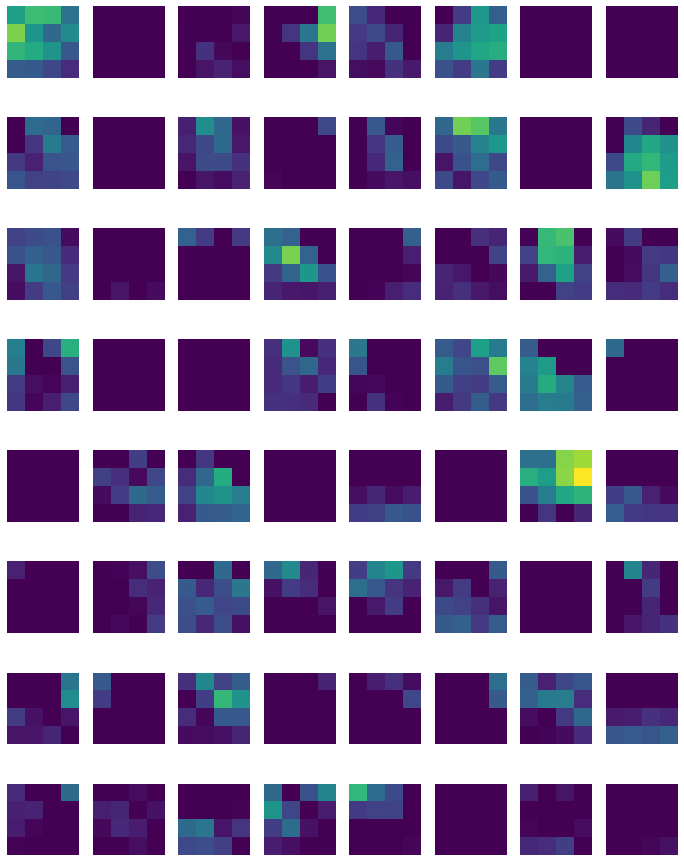

In [0]:
plot_activations_for_layer(x_train[IMAGE_NUM], model, 4)

* Все еще много карт призаков практически без активации (т.е. ничего не регистрируют). Повторяющихся карт признаков стало меньше - т.е. избыточность стала значительно меньше.
* Обратите внимание: карты не похожи друг на друга. Особенно хорошо это видно,  начиная со второго светрочного слоя. Это значит, что на кратах регистрируются более разнообразные признаки. Из таких признаков выходные полносвязные слои извлекут гораздо больше полезной информации.